# Separating classes with Logistic Regression

## Logistic Regression classifies

Linear regression makes a prediction: if `y = mx + b`. Logistic regression produces a probability, an estimate that `y` is either `0` or `1`.

Consider the following dataset:

In [0]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame()
data['x'] = np.array([3,0,5,2,1,0,0,5,6,4,1])
data['y'] = np.array([1,0,1,0,0,0,0,1,1,0,0])
print(data)

    x  y
0   3  1
1   0  0
2   5  1
3   2  0
4   1  0
5   0  0
6   0  0
7   5  1
8   6  1
9   4  0
10  1  0


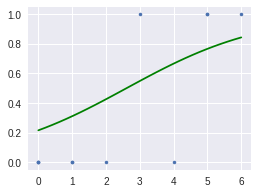

In [0]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(data['x'].values.reshape(-1,1),data['y'].ravel())
y_hat = regr.predict(data['x'].values.reshape(-1,1))

plt.figure(figsize=(4,3))
plt.plot(data['x'],data['y'],'.')

smooth_x = np.linspace(0,6,30)
p = regr.coef_[0] * smooth_x + regr.intercept_
p = 1/(1+np.exp(-p))
plt.plot(smooth_x,p,'g');

In the above, the blue dots are the samples, and the green is the line of probability predicted by the logistic regression. When the logistic regression estimate `p(x) < 0.5, `y = 0`. When `p(x) >= 0.5`, `y = 1`. The next graph shows the prediction of the estimator: 

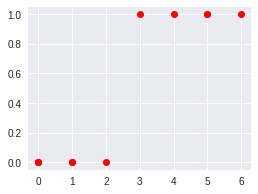

In [0]:
plt.figure(figsize=(4,3))
plt.plot(data['x'],y_hat,'or');

### Challenge

Load the Motor Trend cars dataset at `https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1` and use the `fit` and `predict` functions of `sklearn.linear_model.LogisticRegression` to predict the two binomial columns from that dataset: `vs` and `am`. You choose which feature columns to use.

### Stretch goal

After fitting the model to predict `vs` and `am` on your chosen features, duplicate the above code that draws the sigmoid prediction function using `smooth_x`, `coef_`, and `intercept_`.

In [0]:
df = pd.read_csv('https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1')
print(df.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


71
472


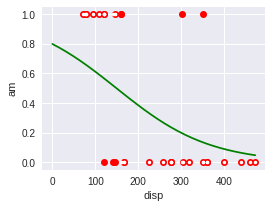

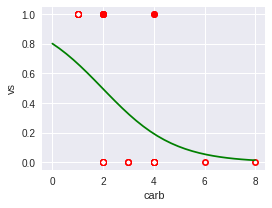

In [0]:
x = 'disp'

lr = LogisticRegression()
lr.fit(df[x].values.reshape(-1,1),df['am'].ravel())
y1 = lr.predict(df[x].values.reshape(-1,1))

plt.figure(figsize=(4,3))
plt.plot(df[x],df['am'],'or')

smooth_x = np.linspace(0,int(max(df[x])), 30)
p = lr.coef_[0] * smooth_x + lr.intercept_
p = 1/(1+np.exp(-p))
print(int(min(df[x])))
print(int(max(df[x])))
plt.plot(smooth_x,p,'g');

plt.plot(df[x],y1,'.w');

plt.xlabel(x);
plt.ylabel('am');
# -----------------------------------------------------------

lr2 = LogisticRegression()
lr2.fit(df['carb'].values.reshape(-1,1),df['vs'].ravel())
y2 = lr2.predict(df['carb'].values.reshape(-1,1))

plt.figure(figsize=(4,3))
plt.plot(df['carb'],df['vs'],'or')

smooth_x2 = np.linspace(0,int(max(df['carb'])),30)
p2 = lr2.coef_[0] * smooth_x2 + lr2.intercept_
p2 = 1/(1+np.exp(-p2))
plt.plot(smooth_x2,p2,'g');

plt.plot(df['carb'],y2,'.w');

plt.xlabel('carb');
plt.ylabel('vs');